# Part 2 : Model-Training & CNN Test

## Importing Libraries

In [4]:
# Importing Libraries
import pandas as pd
import numpy as np
import pickle

In [5]:
df_train=pd.read_csv('train_final.csv',index_col=False)
labels=df_train[['1024']]

In [6]:
df_train.drop(df_train.columns[[1024]],axis=1,inplace=True)
df_train.head(10)

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
np.random.seed(1212)
from tensorflow.python.keras.models import Model
from  tensorflow.python.keras.layers import *
from  tensorflow.python.keras import optimizers
from  tensorflow.python.keras.layers import Input, Dense
from  tensorflow.python.keras.models import Sequential
from  tensorflow.python.keras.layers import Dense
from  tensorflow.python.keras.layers import Dropout
from  tensorflow.python.keras.layers import Flatten
from  tensorflow.python.keras.layers.convolutional import Conv2D
from  tensorflow.python.keras.layers.convolutional import MaxPooling2D
from  tensorflow.python.keras.utils import np_utils
from tensorflow.python.keras import backend as K
K.image_data_format()

'channels_last'

In [9]:
labels=np.array(labels)

In [10]:
from tensorflow.python.keras.utils.np_utils import to_categorical
cat=to_categorical(labels,num_classes=15)

In [200]:
print(cat[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [11]:
df_train.head(10)

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [202]:
df_train.shape

(7465, 1024)

In [12]:
temp=df_train.to_numpy()

In [13]:
X_train = temp.reshape(temp.shape[0], 32,32, 1)

In [14]:
temp.shape[0]

7465

In [206]:
X_train.shape

(7465, 32, 32, 1)

In [15]:
l=[]
for i in range(7465):
    l.append(np.array(df_train[i:i+1]).reshape(1,32,32))

In [16]:
np.random.seed(7)

In [209]:
X_train.shape

(7465, 32, 32, 1)

## Building the CNN model

In [27]:
# model = Sequential()
# model.add(Conv2D(32, (3,3), input_shape=(32,32,1), activation='relu',padding='same'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(15, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dense(50, activation='relu'))
# model.add(Dense(15, activation='softmax'))
from tensorflow import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.callbacks import ReduceLROnPlateau
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.utils.np_utils import to_categorical


import seaborn as sns

np.random.seed(2)

'load the dataset'
dataset = pd.read_csv("train_final.csv")

'creating label'
y=dataset[['1024']]

'dropping label'
X = dataset.drop(labels = ["1024"], axis = 1)

'deleting dataset to reduce memory usage'
del dataset

'overview of dataset'

y.value_counts()

'Grayscale normalization to reduce the effect of illumination differences.'
X = X / 255.0

'reshaping the dataset to fit standard of a 4D tensor of shape [mini-batch size, height = 28px, width = 28px, channels = 1 due to grayscale].'
X = X.values.reshape(-1,32,32,1)

'categorical conversion of label'
y = to_categorical(y, num_classes = 15)

'90% Training and 10% Validation split'
random_seed = 2
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.1 , random_state = random_seed, stratify = y)

model = Sequential()

#Layer: 1
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = "Same", activation = "relu", input_shape = (32, 32, 1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = "Same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#Layer: 2
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = "Same", activation = "relu"))
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = "Same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))


#fully connected layer and output
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(15, activation = "softmax"))



'Set the optimizer and annealer'


model.compile( optimizer='adam', loss = "categorical_crossentropy", metrics = ["accuracy"])

learning_rate_reduction = ReduceLROnPlateau(monitor = "val_accuracy",
                                            patience = 3,
                                            verbose = 1,
                                            factor = 0.5,
                                            min_lr = 0.0001)


'data augmentation'
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)


'fitting the model'
epochs = 10
batch_size = 64


history = model.fit_generator(
                                datagen.flow(X_train,y_train, batch_size=batch_size),
                                epochs = epochs, #An epoch is an iteration over the entire x and y data provided
                                validation_data = (X_val,y_val), #Data on which to evaluate the loss and any model metrics at the end of each epoch. 
                                verbose = 1, #output
                                steps_per_epoch=X_train.shape[0] // batch_size,  # Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch.
                                callbacks=[learning_rate_reduction]                            
                              )
model.save("model.h5")

c:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1961: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
104/104 [==============================] - 35s 331ms/step - loss: 1.0818 - accuracy: 0.6614 - val_loss: 0.1196 - val_accuracy: 0.9572
Epoch 2/10
104/104 [==============================] - 38s 370ms/step - loss: 0.3038 - accuracy: 0.9049 - val_loss: 0.0720 - val_accuracy: 0.9786
Epoch 3/10
104/104 [==============================] - 41s 394ms/step - loss: 0.2051 - accuracy: 0.9391 - val_loss: 0.0527 - val_accuracy: 0.9839
Epoch 4/10
104/104 [==============================] - 38s 366ms/step - loss: 0.1690 - accuracy: 0.9489 - val_loss: 0.0431 - val_accuracy: 0.9853
Epoch 5/10
104/104 [==============================] - 40s 384ms/step - loss: 0.1454 - accuracy: 0.9551 - val_loss: 0.0475 - val_accuracy: 0.9866
Epoch 6/10
104/104 [==============================] - 38s 369ms/step - loss: 0.1198 - accuracy: 0.9632 - val_loss: 0.0506 - val_accuracy: 0.9880
Epoch 7/10
104/104 [==============================] - 38s 365ms/step - loss: 0.1079 - accuracy: 0.9684 - val_loss: 0.0309 - val_ac

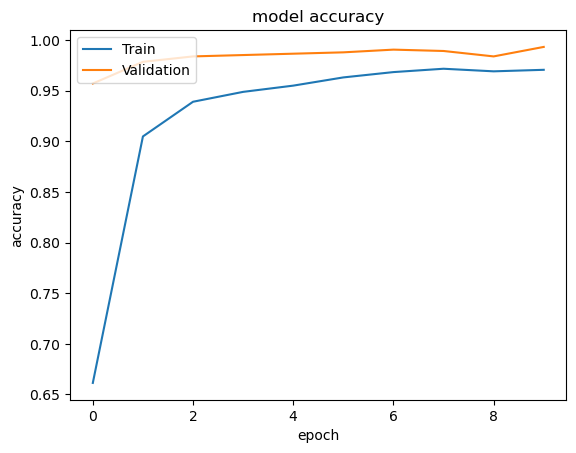

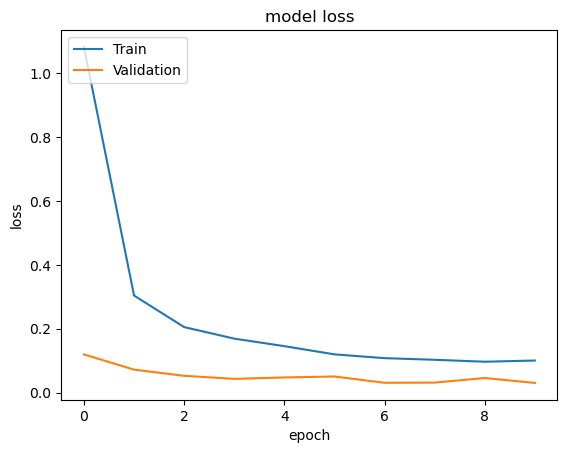

In [29]:
# Compile model
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# model_json = model.to_json()
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# model.save_weights("model.h5")
# # model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Training the model

In [20]:
from tensorflow.python.keras.models import model_from_json

In [21]:
model.fit(X_train, cat, epochs=10, batch_size=100,shuffle=True,verbose=1)

AttributeError: module 'keras.src' has no attribute 'utils'

In [22]:
model_json = model.to_json()
with open("model_final.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_final.h5")

In [23]:
import cv2
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
# K.set_image_dim_ordering('th')



AttributeError: module 'keras.src' has no attribute 'utils'

In [30]:
from tensorflow.python.keras.models import model_from_json
json_file = open('model.json', 'r')

loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")

In [50]:
print(5)
score = model.evaluate(X_val, y_val, verbose = 0 )
print("Test Score: ", score[0])
print("Test accuracy: ", score[1])

5
Test Score:  0.030420752242207527
Test accuracy:  0.993306577205658


In [34]:
import cv2
import numpy as np
img = cv2.imread('2x.jpg')

In [25]:
img
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        832       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        25632     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)         

In [37]:

import os
root = os.getcwd()
if img is not None:
    #images.append(img)

    train_data=[]
    image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    pixel_values = image.reshape((-1, 3))
    
    # convert to float
    pixel_values = np.float32(pixel_values)
    #K means with k=2
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    k = 2
    _, labels, (centers) = cv2.kmeans(pixel_values, k, None,criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    centers2=np.uint8([[255,255,255],[0,0,0]])
    # flatten the labels array
    labels = labels.flatten()
    segmented_image = centers2[labels.flatten()]
    segmented_image = segmented_image.reshape(image.shape)
    # show the image
    if(segmented_image[0,0,0]!=0):
        segmented_image=~segmented_image
    img=segmented_image
    flag=0
    first=0
    last=0
    imglist=[]
    flag2=0
    firstfr=0
    
    #This for loop separates the segmented digits and operations
    for i in range(img.shape[1]-6):
        if np.sum(img[:,i,0])==0 :
            if np.sum(img[:,firstfr+6,0])==0 :
                flag2=0
            if np.sum(img[:,firstfr+6,0])!=0 :
                if flag==1:
                    if np.sum(img[:,i+4,0])==0:
                        last=i
                        #cut here on right on middle +5
                        imglist.append(img[:,first:last+2,:])
                        first=i+2
                        flag2=0
                        flag=0

                continue
        if np.sum(img[:,i,0])!=0:
            if flag2==0:
                firstfr=i
            flag2=1
            flag=1
            continue
    #this for loop remove border black pixels to center the digits  
    word =1 
    letter_index = 0
    for m in range(len(imglist)):       
        var0=np.var(imglist[m][:,:,0],axis=0)
        var1=np.var(imglist[m][:,:,0],axis=1)
        #to not remove indices from middle(for ''='' case)
        indices0=[i for i in list(range(len(var0))) if var0[i]==0]
        indices1=[i for i in list(range(len(var1)-5)) if var1[i]==0 and np.sum(var1[i+5])==0]
        temp0=imglist[m]
        temp0=np.delete(temp0,indices0,axis=1)
        temp0=np.delete(temp0,indices1,axis=0)
        letter_index += 1
        temp0=np.pad(temp0[:,:,0],pad_width=10,mode='constant',constant_values=0)
        temp0=np.repeat(temp0[:,:,np.newaxis],3,axis=2)
        element=cv2.getStructuringElement(cv2.MORPH_RECT,(2,2))
        im2=temp0
        for i in range(0, 1):
            eroded = cv2.erode(temp0.copy(), element, iterations=i + 1)
            im2=eroded
            T, threshInv = cv2.threshold(eroded, 230, 0, cv2.THRESH_BINARY_INV)
  

        temp0 = im2[:,:,0]
        im_resize = cv2.resize(temp0,(32,32))
        cv2.imwrite(os.path.join(root, str(i+1)+''+str(word)+''+str(letter_index)+'.jpg'),im_resize )
        
        im_resize=np.reshape(im_resize,(32,32,1))
        train_data.append(im_resize)
len(train_data)

       

6

In [38]:
s=''
print(len(train_data))
for i in range(len(train_data)):
    train_data[i]=np.array(train_data[i])
    train_data[i]=train_data[i].reshape(1,32,32,1)
#     result=loaded_model.predict_classes(train_data[i])
    result=np.argmax(loaded_model.predict(train_data[i]), axis=-1)
    if(result[0]==12):
        s=s+'='
    if(result[0]==13):
        s=s+'x'
    if(result[0]==14):
        s=s+'y'
    if(result[0]==10):
        s=s+'-'
    if(result[0]==11):
        s=s+'+'
    if(result[0]==0):
        s=s+'0'
    if(result[0]==1):
        s=s+'1'
    if(result[0]==2):
        s=s+'2'
    if(result[0]==3):
        s=s+'3'
    if(result[0]==4):
        s=s+'4'
    if(result[0]==5):
        s=s+'5'
    if(result[0]==6):
        s=s+'6'
    if(result[0]==7):
        s=s+'7'
    if(result[0]==8):
        s=s+'8'
    if(result[0]==9):
        s=s+'9'
    
print(s)

6
8x+5=0


## Our Model was successfully Tested 

# Thank You !